<a href="https://colab.research.google.com/github/Nallin-kumar/ML_Algos/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 2. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [4]:
# 3. Use only two classes and two features
X = X[y != 2]
y = y[y != 2]
X = X[:, :2]  # sepal length and width


In [5]:
# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 5. Create and train the SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)


SVC(kernel='linear')

In [7]:
# 6. Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



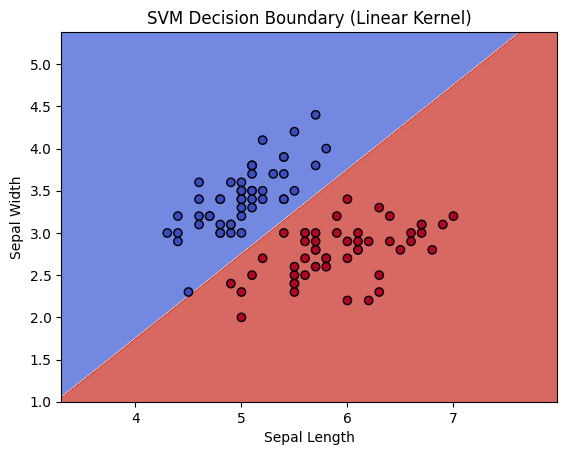

In [8]:
# 7. Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.show()

plot_decision_boundary(X, y, model)



**3D Plot**

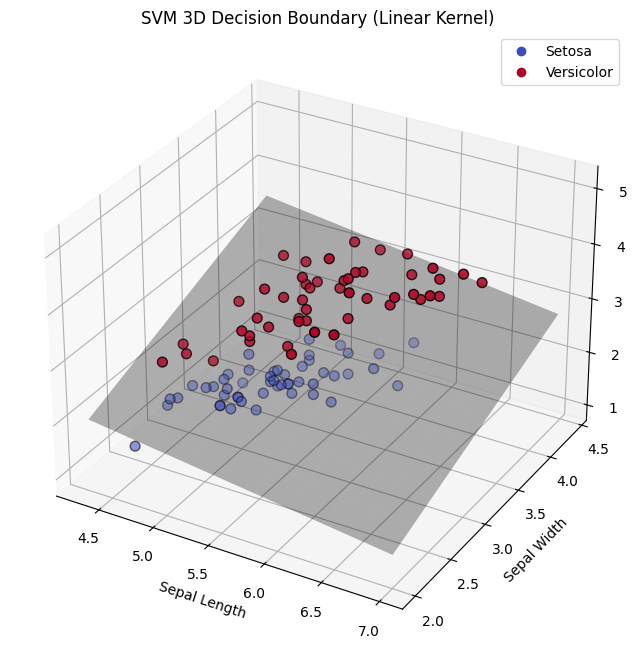

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Filter only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Use 3 features: Sepal Length, Sepal Width, Petal Length
X = X[:, [0, 1, 2]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Coefficients and intercept
w = model.coef_[0]
b = model.intercept_[0]

# Create grid to plot decision boundary
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
xx, yy = np.meshgrid(x_range, y_range)

# Solve for z using: w1*x + w2*y + w3*z + b = 0  → z = -(w1*x + w2*y + b)/w3
zz = -(w[0]*xx + w[1]*yy + b) / w[2]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)

# Plot decision boundary
ax.plot_surface(xx, yy, zz, alpha=0.3, color='black')

# Labels and view
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('SVM 3D Decision Boundary (Linear Kernel)')

# Legend
legend_labels = ['Setosa', 'Versicolor']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()
